In [ ]:
## Ward Sarvis Section A

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [54]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic_df = pd.read_csv("Data/titanic.csv")
titanic_df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,1,0,0,211536,Rev,0
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,0,0,1,112053,Miss,0
888,22.0,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,0,1,0,W./C. 6607,Miss,3
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,1,0,1,111369,Mr,0


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [7]:
'''your code here'''
titanic_df.describe()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.445196,32.204208,0.381594,446.000000,2.308642,0.647587,0.523008,0.383838,0.904602
std,13.244896,49.693429,0.806057,257.353842,0.836071,0.477990,1.102743,0.486592,1.613459
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,14.454200,0.000000,446.000000,3.000000,1.000000,0.000000,0.000000,0.000000
75%,35.500000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,1.000000,8.000000,1.000000,10.000000


Your written answer:

 - 891
 - 64.7%
 - 38.4%
 - Mean for 1s and 0s columns is %

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [20]:
'''your code here'''
males = len(titanic_df.query('Sex == 1'))
males_survived = len(titanic_df.query('Sex == 1 and Survived == 1'))
male_percent = (males_survived/males)*100
females = len(titanic_df.query('Sex == 0'))
females_survived = len(titanic_df.query('Sex == 0 and Survived == 1'))
female_percent = (females_survived/females)*100
display(male_percent)
display(female_percent)

18.890814558058924

74.20382165605095

Your written answer:

 - 74.2%
 - 18.89%

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [51]:
'''your code here'''
grp_titanic_df = titanic_df.groupby(['Pclass', 'Survived']).agg({'Survived':'sum', 'Pclass':'sum'})
display(grp_titanic_df)
#The numbers in the Pclass column seem to be multiplied by the class, but dividing them by the class number gets the amount for each one
class1tickets = (((grp_titanic_df['Pclass'][1][1]) + (grp_titanic_df['Pclass'][1][0]))/891)*100
display(class1tickets)
class1surv = ((grp_titanic_df['Pclass'][1][1]) / ((grp_titanic_df['Pclass'][1][1]) + (grp_titanic_df['Pclass'][1][0])))*100
display(class1surv)
class2tickets = ((((grp_titanic_df['Pclass'][2][1])/2) + ((grp_titanic_df['Pclass'][2][0])/2))/891)*100
display(class2tickets)
class2surv = (((grp_titanic_df['Pclass'][2][1])/2) / (((grp_titanic_df['Pclass'][2][1])/2) + ((grp_titanic_df['Pclass'][2][0])/2)))*100
display(class2surv)
class3tickets = ((((grp_titanic_df['Pclass'][3][1])/3) + ((grp_titanic_df['Pclass'][3][0])/3))/891)*100
display(class3tickets)
class3surv = (((grp_titanic_df['Pclass'][3][1])/3) / (((grp_titanic_df['Pclass'][3][1])/3) + ((grp_titanic_df['Pclass'][3][0])/3)))*100
display(class3surv)

Survived  Pclass
Pclass Survived                  
1      0                0      80
       1              136     136
2      0                0     194
       1               87     174
3      0                0    1116
       1              119     357

24.242424242424242

62.96296296296296

20.65095398428732

47.28260869565217

55.106621773288445

24.236252545824847

Your written answer:

 - Class 1 
    - % tickets: 24.24
    - % survivorship: 62.96
- Class 2 
    - % tickets: 20.65
    - % survivorship: 47.28
- Class 3
    - % tickets: 55.11
    - % survivorship: 24.24


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

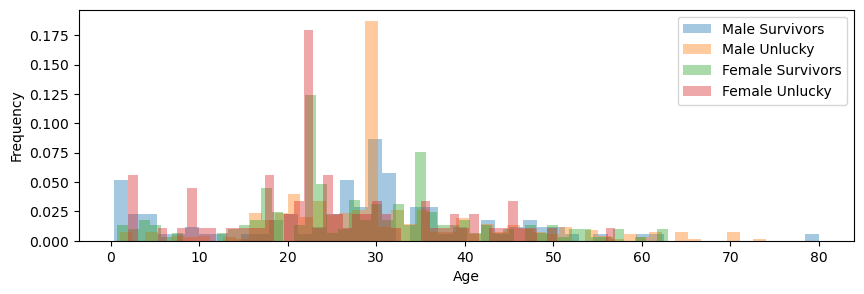

In [108]:
'''Your code here'''
cols = ['Age', 'Name', 'Sex']
survivors_df = (titanic_df.query('Survived == 1'))[cols]
#display(survivors_df)
died_df = (titanic_df.query('Survived == 0'))[cols]
#display(died_df)
male_survivors = (survivors_df.query('Sex == 1'))[['Age']]
female_survivors = (survivors_df.query('Sex == 0'))[['Age']]
male_unlucky = (died_df.query('Sex == 1'))[['Age']]
female_unlucky = (died_df.query('Sex == 0'))[['Age']]

plot_ops = dict(histtype = 'stepfilled', bins = 50, density = True, alpha = 0.4)

fig, ax = plt.subplots(1,1, figsize = (10,3))
ax.hist(male_survivors, **plot_ops, label = 'Male Survivors')
ax.hist(male_unlucky, **plot_ops, label = 'Male Unlucky')
ax.hist(female_survivors, **plot_ops, label = 'Female Survivors')
ax.hist(female_unlucky, **plot_ops, label = 'Female Unlucky')

ax.set_ylabel('Frequency')
ax.set_xlabel('Age')
ax.legend()
plt.show()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [124]:
def plotDecisionBoundary(model, data = None, xy_lim = None, ax = None):

    import matplotlib.pyplot as plt
    import numpy as np
    
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize = (5,5))
    else:
        fig = ax.get_figure()
    
    # Check if data or xy_lim is provided
    if data is None and xy_lim is None:
        raise ValueError('If data is None, xy_lim must be provided')
    elif xy_lim is not None:
        f0_min, f0_max, f1_min, f1_max = xy_lim[0][0], xy_lim[0][1], xy_lim[1][0], xy_lim[1][1]
    elif not data is None:
        X = data[0]
        y = data[1]
        f0_min, f0_max, f1_min, f1_max = min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1])

    range0, range1 = f0_max-f0_min, f1_max-f1_min

    F0, F1 = np.meshgrid(np.linspace(f0_min-0.1*range0, f0_max+0.1*range0, 200), np.linspace(f1_min-0.1*range1, f1_max+0.1*range1, 200))
    F_grid = np.vstack([F0.ravel(), F1.ravel()]).transpose()

    labels = model.classes_
    label_nums = np.arange(len(labels))
    label_dict = dict(zip(labels, label_nums))

    y_grid = model.predict(F_grid)
    y_num_grid = np.array([label_dict[y_lab] for y_lab in y_grid]).reshape(F0.shape)

    cmap = plt.get_cmap('tab10', len(labels))
    ax.contourf(F0, F1, y_num_grid, cmap = cmap, alpha = 0.25)

    if not data is None:
        for label, label_num in zip(labels, label_nums):
            ax.scatter(X[y==label,0], X[y==label,1], label = label, s = 10, alpha = 0.75)
        ax.legend()
    plt.show()

    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_aspect('equal')
    return fig, ax

In [116]:
'''Your code here'''
features = ['Age', 'Sex', 'Pclass', 'Fare', 'Family_Size']
label = ['Survived']
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(titanic_df[features], titanic_df[label], test_size = 0.2)

ss = StandardScaler()
ss.fit(X_train)

Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = y_train.values.ravel()
ys_test =  y_test.values.ravel()


In [118]:
knn_clf = KNeighborsClassifier(n_neighbors = 1)

knn_clf.fit(Xs_train, ys_train)

KNeighborsClassifier(n_neighbors=1)

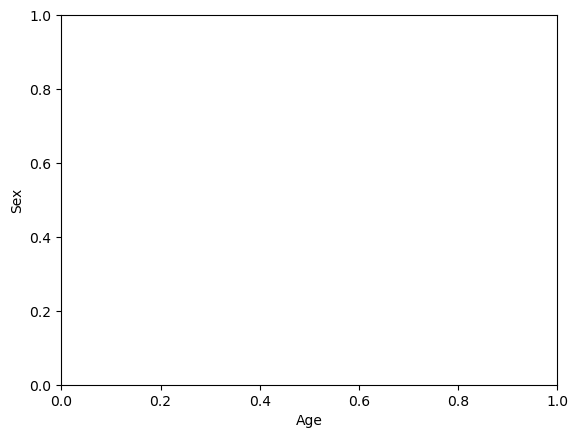

In [132]:
fig, ax = plt.subplots(1, 1)
#plotDecisionBoundary(knn_clf, data = (Xs_train, ys_train), ax = ax)
#fig, ax = plotDecisionBoundary(knn_clf, data = (Xs_train, ys_train))
ax.set_xlabel('Age')
ax.set_ylabel('Sex')
plt.show()

#neither of the lines above for plotting works and I'm not sure why

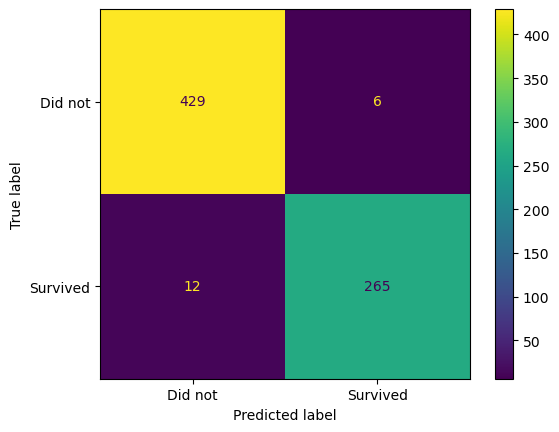

In [134]:
from sklearn.metrics import ConfusionMatrixDisplay

y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf.predict(Xs_test)

ConfusionMatrixDisplay.from_predictions(ys_train, y_knn_train, display_labels = ['Did not', 'Survived'])
plt.show()

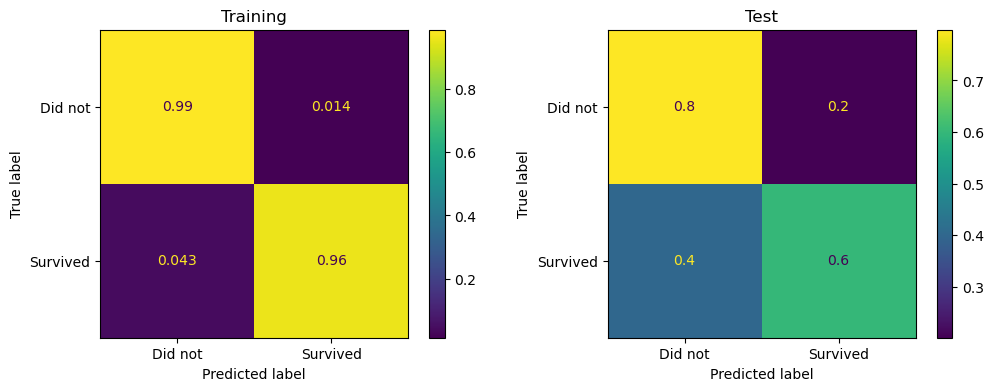

In [148]:
fig, ax = plt.subplots(1,2, figsize = (12, 4))

ConfusionMatrixDisplay.from_predictions(y_train, y_knn_train, normalize = 'true', display_labels = ['Did not', 'Survived'], ax = ax[0])

ConfusionMatrixDisplay.from_predictions(y_test, y_knn_test, normalize = 'true', display_labels = ['Did not', 'Survived'], ax = ax[1])

ax[0].set_title ('Training')
ax[1].set_title ('Test')

plt.show()

In [140]:
from sklearn.svm import SVC

svc_clf = SVC(kernel = 'rbf', gamma = 1)

svc_clf.fit(X_train, y_train)

y_svc_train = svc_clf.predict(X_train)

y_svc_test = svc_clf.predict(X_test)


C:\Users\wardj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [146]:
#plotDecisionBoundary(svc_clf, data = (Xs_train, ys_train))
plt.show()

#again, I'm not sure why the plot doesn't work

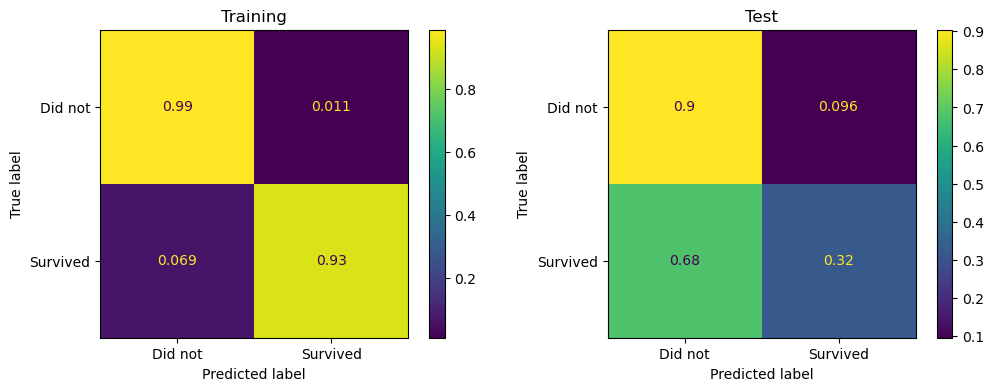

In [150]:
fig, ax = plt.subplots(1,2, figsize = (12, 4))

ConfusionMatrixDisplay.from_predictions(y_train, y_svc_train, normalize = 'true', display_labels = ['Did not', 'Survived'], ax = ax[0])

ConfusionMatrixDisplay.from_predictions(y_test, y_svc_test, normalize = 'true', display_labels = ['Did not', 'Survived'], ax = ax[1])

ax[0].set_title ('Training')
ax[1].set_title ('Test')

plt.show()

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - For did not survive it works pretty well, only going down to 0.8 for knn and only going down to 0.9 for svc. But, it gets a lot worse for survived where it goes down to 0.6 for knn and 0.32 for svc.


Which models did you fit and which worked better?
 
 - The knn model seemed to work better since the confusion matrix values were still 0.6 or above, but was still not as good as the training data (which is to be expected).